In [1]:
import pylef   # importar pylef 
import visa    # importar a bilioteca pyVISA para lidar com virtualização de instrumentos
import matplotlib.pyplot as plt  # importar a bilioteca pyplot para fazer gráficos
import numpy as np   # importar a biblioteca Numpy para lidar com matrizes
import time          # importar a bilioteca para funções temporais
import pandas as pd   # importa bilioteca pandas para  lidar com processamento de dados
# próxima linha faz plotar o gráfico dentro do notebook
%matplotlib inline   

In [2]:
?pylef  # imprime o help para o pylef

In [3]:
# imprime os recursos para ter certeza que os instrumentos estão conectados
visa.ResourceManager().list_resources()

('USB0::0x0699::0x03B0::C011186::INSTR',
 'USB0::0xF4ED::0xEE3A::388A15157::INSTR')

# Exemplos do uso do pylef

Os controles tanto do gerador quanto o osciloscópios são baseados no que se pode fazer fisicamente no instrumento e da maneira mais intuitiva que conseguimos. 

## Gerador de Funções

Para o gerador de funções é possivel acessar os dois canais individualmente. Podemos ligar e desligar os canais, escolher a forma de onda e ajustar todos os seus parâmetros, como frequência, tensão pico-a-pico, offset DC, defasagem. Também é possível ligar e desligar a saída de sincronia (SYNC) para o trigger externo do osciloscópio.

Como é comum no Jupyter, as informações sobre determinada função ou módulo, pode ser encontradas executando a função com uma interrogação antes do nome, por exemplo "?pylef.BK4052" imprime informações sobre o osciloscópio. Se o help estiver errado, incompleto ou não estiver claro, nos avise!

## Osciloscópio

Para o osciloscópio é possivel acessar cada canal individualmente também, assim como o trigger e o modo MATH. Podemos ajustar as escalas dos canais (inclusive de forma dinâmica), fazer diversas medidas e adquirir as formas de onda presentes na tela. Também podemos ajustar o trigger e salvar os dados diretamente em um arquivo texto.

In [4]:
func_gen = pylef.BK4052()          # definição do gerador de funções
scope = pylef.TektronixTBS1062()   # definição do osciloscópio

Gerador de Funções conectado! Id = *IDN BK Precision,4052,388A15157,1.01.01.31R3,02-00-00-22-26
Osciloscópio conectado! Id = TEKTRONIX,TBS 1062,C011186,CF:91.1CT FV:v26.01


In [5]:
# imprime ajuda para o gerador de funções
?func_gen

In [6]:
# informações sobre o gerador de fuções
print(func_gen.ch1.wave_info())   # informações sobre a função no canal 1
print(func_gen.ch2.wave_info())   # informações sobre a função no canal 2

{'frequency': 110.0, 'offset': 0.0, 'Vpp': 4.0, 'type': 'sine', 'phase': 0.0}
{'frequency': 1000.0, 'offset': 0.0, 'Vpp': 4.0, 'type': 'sine', 'phase': 0.0}


In [7]:
# checar se o canal está ligado
print(func_gen.ch1.state())  # checa se o canal está ligado ou desligado
func_gen.ch1.turn_on()    # liga o canal 1
print(func_gen.ch1.state())  # checa se o canal está ligado ou desligado

ON
ON


In [20]:
# Duas formas de trabalhar: podemos criar uma variável para cada canal!!!
canal1 = func_gen.ch1   # cria uma variável para cada canal
print(canal1.state())  # checa se o canal está ligado ou desligado
canal1.turn_on()    # desliga o canal 1
print(canal1.state())  # checa se o canal está ligado ou desligado

OFF
ON


In [21]:
# liga o gerador de novo
canal1.turn_on()

In [22]:
### vamos colocar a onda que queremos
freq = 100.0 # frequência de 100 Hz
Vpp = 2.0    # voltagem pico-a-pico de 2 V
offset = 0.0  # offset zero
tipo = 'sine'   # tipo da forma de onda (em inglês)
### enviar comando 
func_gen.ch1.set_function(tipo)
func_gen.ch1.set_frequency(freq) 
func_gen.ch1.set_Vpp(Vpp)
func_gen.ch1.set_offset(offset)

In [23]:
# imprime informações sobre a onda
func_gen.ch1.wave_info()

{'Vpp': 2.0, 'frequency': 100.0, 'offset': 0.0, 'phase': 0.0, 'type': 'sine'}

In [24]:
# cria onda quadrada
func_gen.ch1.set_function('square')
func_gen.ch1.wave_info()

{'Vpp': 2.0,
 'duty_cycle': 50.0,
 'frequency': 100.0,
 'offset': 0.0,
 'phase': 0.0,
 'type': 'square'}

In [25]:
# Quais tipos de onda podemos ter?
func_gen.ch1.functions

['SINE', 'SQUARE', 'RAMP', 'PULSE', 'NOISE', 'ARB', 'DC']

In [26]:
# cria onda triangular?
func_gen.ch1.set_function('tamp')
func_gen.ch1.wave_info()

ValueError: The functions must be one of those: sine, square, ramp, pulse, noise, arb, dc

In [27]:
# Ops, deu errado! Leia a mensagem de erro!! Achou o erro?
func_gen.ch1.set_function('ramp')
func_gen.ch1.wave_info()

{'Vpp': 2.0,
 'frequency': 100.0,
 'offset': 0.0,
 'phase': 0.0,
 'symmetry': 50.0,
 'type': 'ramp'}

In [28]:
# E se alguém mudar a lista de funções. Tenta aí! Boa sorte!!
func_gen.ch1.functions = ['pepe']

AttributeError: Can't touch functions

In [29]:
# imprime ajuda para o scope
?scope

In [32]:
# Osciloscópio está louco?" Configurando o trigger externo (lembre-se de fazer a ligação da saída de 
# SYNC do gerador na entrada EXT do osciloscópio
func_gen.ch1.sync_on()   # ligar o sync reference ao canal 1
scope.trigger.set_source('ext')  # ajusta o trigger para externo no osciloscópio

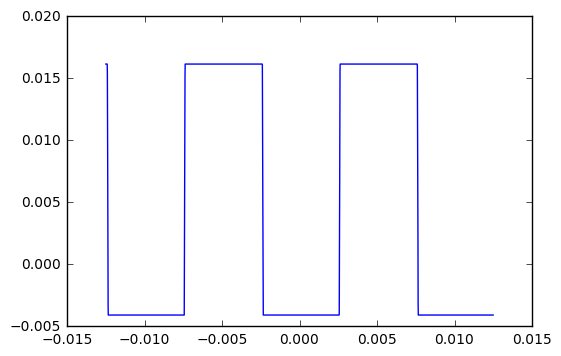

In [33]:
## Mude a escala do osciloscópio para 2mV!!
# aquisição da função mostrada na tela do osciloscópio
t, V = scope.ch1.read_channel()   # adquire dados de tensão por tempo
plt.plot(t, V)   # plot V x t
plt.show()       # mostra o gráfico

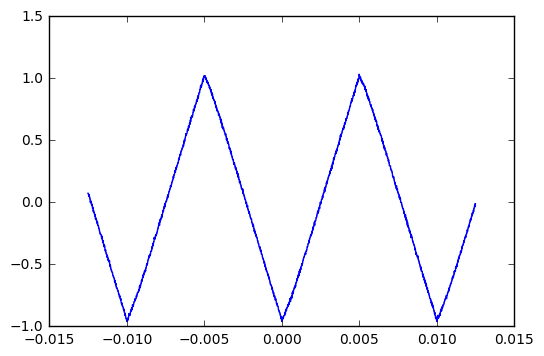

In [34]:
## Ops, mas não era para ser uma onda triangular?
## Ajuste a escala do osciloscópio ou use a função set_smart_scale
scope.ch1.set_smart_scale()    # muda a escala dinamicamente para aparecer na tela
t, V = scope.ch1.read_channel()   # adquire dados de tensão por tempo
plt.plot(t, V)   # plot V x t
plt.show()       # mostra o gráfico

In [35]:
# E as medidas? Use a subclasse measure
scope.ch1.measure.period(), scope.ch1.measure.frequency(), scope.ch1.measure.Vpp()

(0.0100099994, 99.9001083374, 1.9815365076)

# Aplicação 1: Varredura em frequência de um filtro passa-baixa 

Conecte um capacitor de $2.2\, \mu C$ e um resistor de $150\, \Omega$ na configuração de filtro passa-baixa. Ligue o canal 1 do gerador de função no canal 1 do osciloscópio e conecte o canal 2 do osciloscópio entre o resistor e o gerador de funções. Também conecte a saída SYNC do gerador de funções na entrada EXT do osciloscópio

In [37]:
## Ligue um capacitor de 2.2 uC e um resistor de 150 Ohm na configuração de filtro passa-baixa
R, C = 150, 2.2e-6    # definições de R e C
omega = 1./(R*C)    # frequência de cotovelo ângular
freq = omega/(2*np.pi)       # frequência de cotovelo
print('frequência de cotovelo = %4.1f Hz' % freq)  # imprime frequência de cotovelo em Hz

frequência de cotovelo = 482.3 Hz


In [38]:
##### Pré-aquisição
# mude a onda para uma senóide! O que acontece se usarmos a onda triângular?
func_gen.ch1.set_function('sine')
## ajuste o trigger externo
func_gen.ch1.sync_on()   # ligar o sync reference ao canal 1
scope.trigger.set_source('ext')  # ajusta o trigger para externo no osciloscópio
## ajusta média nos canais
scope.set_average_number(4)  # ajusta o número de médias
scope.set_average()    # turn average ON
#scope.set_sample()       # turn average OFF
## parametros de varredura
PATH = 'exemplo-pylef/'  # pasta onde salvar todos os arquivos
Vpp = 2.0   # Tensão pico-a-pico na saida do gerador
freq0, freq1, Nfreq = 10, 30e3, 20  # frequências inicial, final e número de pontos
## parâmetros inicias do gerador
func_gen.ch1.set_frequency(freq0) 
func_gen.ch1.set_Vpp(Vpp)
func_gen.ch1.set_offset(0.0)
func_gen.ch1.set_phase(0.0)
## tenha certeza que o gerador está ligado e que o canal 1 está na escala certa
func_gen.ch1.turn_on()   # liga o canal 1
scope.set_horizontal_scale((1/freq0)/4.)  # escala horizontal = 1/4 período (2.5 oscilações em tela)
scope.ch1.set_smart_scale()  # rescala o canal 1
scope.ch2.set_smart_scale()  # rescala o canal 2

... file => freq_sweep1_16_02_02 saved!!


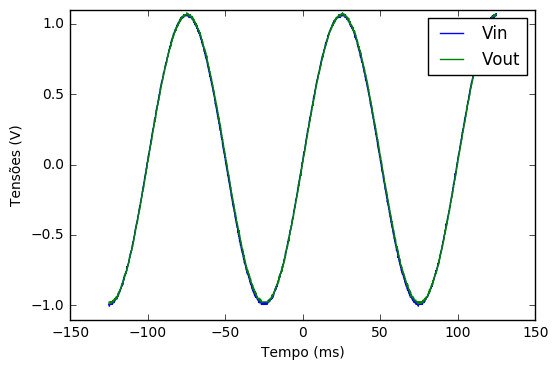

... file => freq_sweep2_16_02_15 saved!!


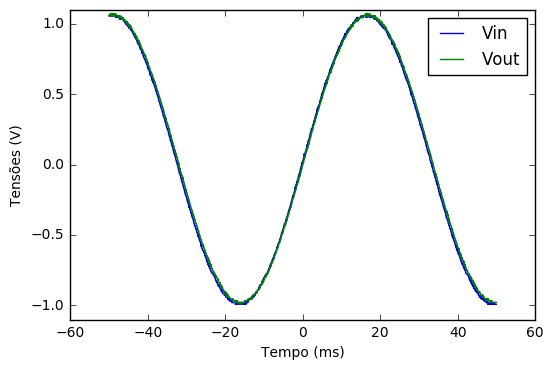

... file => freq_sweep3_16_02_28 saved!!


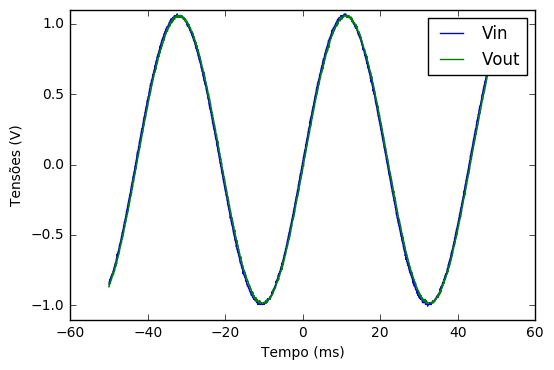

... file => freq_sweep4_16_02_40 saved!!


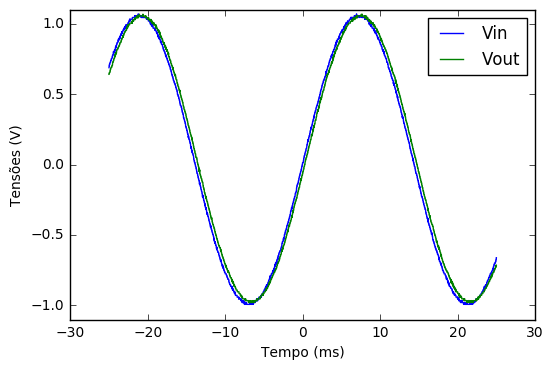

... file => freq_sweep5_16_02_53 saved!!


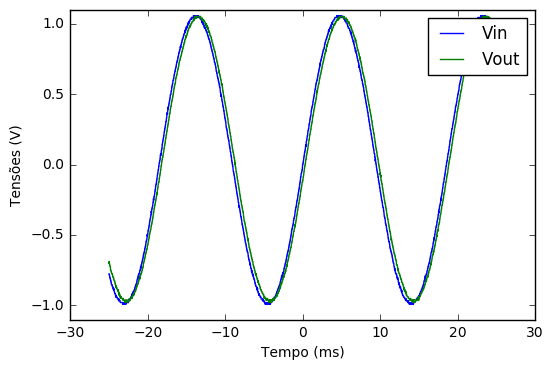

... file => freq_sweep6_16_03_06 saved!!


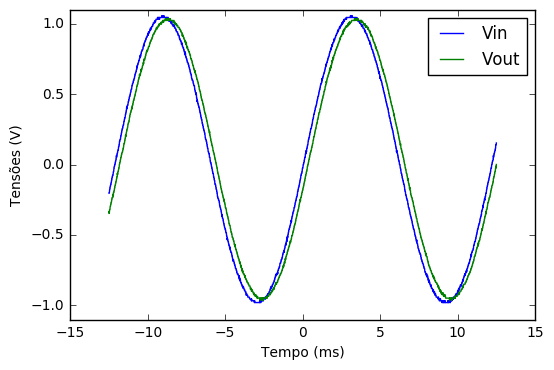

... file => freq_sweep7_16_03_19 saved!!


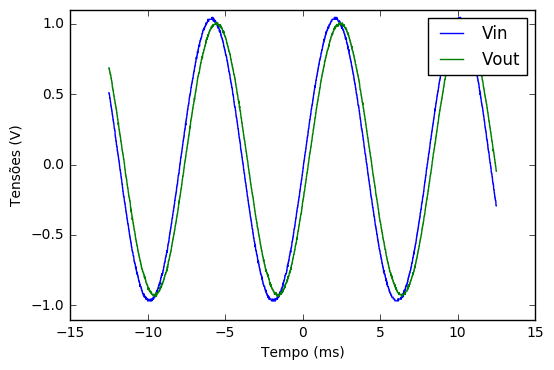

... file => freq_sweep8_16_03_32 saved!!


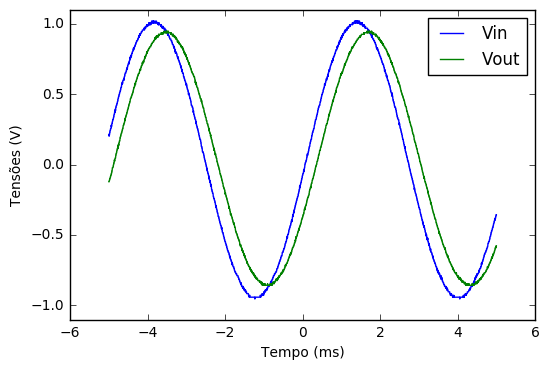

... file => freq_sweep9_16_03_45 saved!!


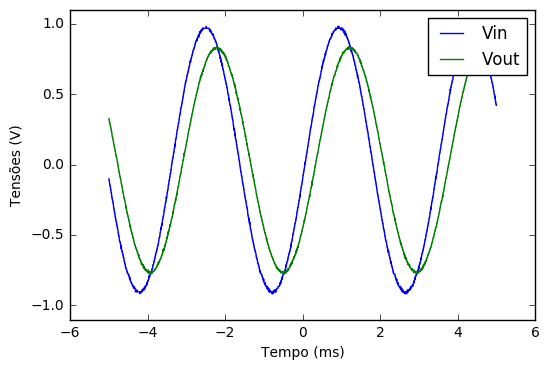

... file => freq_sweep10_16_03_58 saved!!


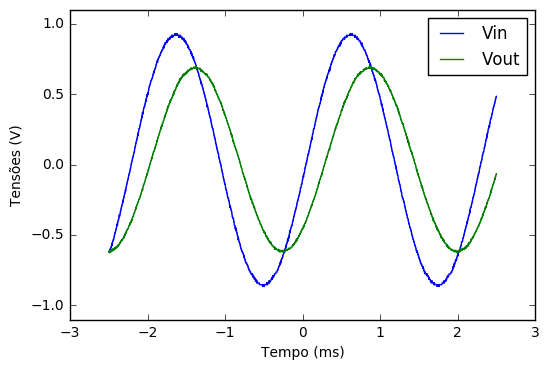

... file => freq_sweep11_16_04_11 saved!!


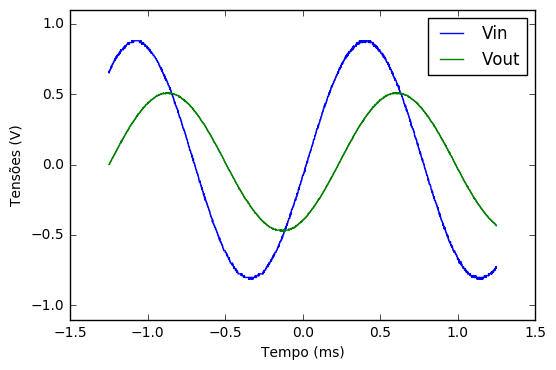

KeyboardInterrupt: 

In [39]:
#### Aquisição de dados!! ####
freq = np.logspace(np.log10(freq0), np.log10(freq1), Nfreq, endpoint = True)  # varredura logaritmica
Vpp1, Vpp2 = [], []    # listas para guardar as variáveis
phase1, phase2 = [], []    # listas para guardar as variáveis
### aquisição de dados no gerador com varredura de frequência
for m, freqP in enumerate(list(freq)):  # loop de aquisição
    ### ajuste dos instrumentos
    func_gen.ch1.set_frequency(freqP)   # muda a frequência
    periodP = 1./freqP   # período da onda
    num = np.floor(-np.log10(periodP)/3.) + 1 # referência para a escala do gráfico
    scope.set_horizontal_scale(periodP/4.)  # escala horizontal = 1/4 período (2.5 oscilações em tela)
    time.sleep(0.05)   # espere 50 microssegundos
    scope.ch2.set_smart_scale()    #  rescala o canal 2
    ### aquisição de dados
    Vpp1.append(scope.ch1.measure.Vpp()) # acumula a medida do Vpp no canal 1
    phase1.append(scope.ch1.measure.phase()) # acumula a medida da fase no canal 1    
    time.sleep(0.05)  # wait between the data acquisition
    Vpp2.append(scope.ch2.measure.Vpp())  # acumula a medida do Vpp no canal 2
    phase2.append(scope.ch2.measure.phase()) # acumula a medida da fase no canal 2
    ### leitura dos traços temporais
    (t1, V1) = scope.ch1.read_channel()  # mede o canal 1
    (t2, V2) = scope.ch2.read_channel()  # mede o canal 2
    ### produção das figuras
    fig = plt.figure()  # definição da figura
    ax = fig.add_subplot(111)  # definição do eixo
    ax.plot(t1*10**(3*num), V1, label = 'Vin')   # plota canal 1
    ax.plot(t2*10**(3*num), V2, label = 'Vout')   # plota canal 2
    plt.axis([None, None, -1.1*Vpp/2, 1.1*Vpp/2])    # ajusta os máximos e mínimos dos gráficos
    ax.set_ylabel('Tensões (V)')
    ax.legend()   # imprime as legendas no gráfico
    if num == 0.0: ax.set_xlabel('Tempo (s)')    
    if num == 1.0: ax.set_xlabel('Tempo (ms)')
    if num == 2.0: ax.set_xlabel('Tempo (us)')
    ### salva em arquivo os dados da aquisição
    file_sweep_name = 'freq_sweep' + str(m + 1)   # nome dos arquivos de sweep
    scope.save_channels(file_sweep_name, PATH = PATH)    
    fig.savefig(PATH + file_sweep_name + '.png', bbox_inches = 'tight')
    plt.show()      # impressão na tela!
Vpp1 = np.array(Vpp1)  # convete a lista em array
Vpp2 = np.array(Vpp2)  # convete a lista em array
phase1 = np.array(phase1)  # convete a lista em array
phase2 = np.array(phase2)  # convete a lista em arra

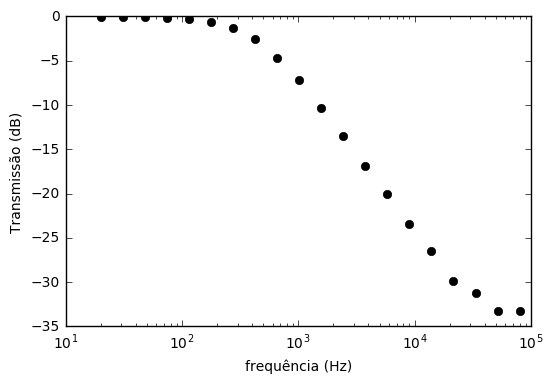

In [27]:
## Análise de dados (não mude a variável PATH)
T = Vpp2/Vpp1   # cálculo da transmissão 
T_dB = 20*np.log10(T)  # transmissão em dB
dados = pd.DataFrame()   # inicializa um dataframe do pandas
dados['Vpp1 (V)'], dados['Vpp2 (V)'] = Vpp1, Vpp2
dados['fase1 (rad)'], dados['fase2 (rad)'] = Vpp1, Vpp2
dados['frequencia (Hz)'], dados['T'] , dados['T_dB'] = freq, T, T_dB 
# plota o diagrama de bode para a transmissão e exporta em png
fig = plt.figure()   # define uma figura
ax = fig.add_subplot(111)  # define um eixo
ax.plot(freq, T_dB, 'ko')   # plota a transmissão  
ax.set_xscale('log')   # seta a escala de x para logaritmica
# Por que não usamos escala log no eixo y também?
ax.set_xlabel('frequência (Hz)')   # seta escala do eixo x
ax.set_ylabel('Transmissão (dB)')   # seta escala do eixo y
fig.savefig(PATH + 'bode_diag.png', bbox_inches = 'tight')  # salva figura na pasta de trabalho
dados.to_csv(PATH + 'dados_sweep.csv')
plt.show()

# Aplicação 2: Diodo e retificador de meia-onda

Agora conecte um diodo diretamente polarizado na saída do gerador de funções. Vamos fazer quatro exemplos e para cada um deles, você terá que fazer um procedimento específico:

1. Verificar a propriedade fundamental do diodo: a corrente flui em apenas um sentido
1. Variar a tensão de entrada e derificar a relação da tensão de saída com a de entrada para ver o efeito da tensão da zona de depleção
3. Ligar um capacitor entre o diodo e o terra e verificar o efeito da retificação.
4. Variar a capacitância e verificar a relação entre tempo de carga e o tamanho do riple: *cobertor curto*
2. Retirar o capacitor e variar a frequência do sinal de entrada e verificar o efeito da capacitância da zona de depleção: retificação natural para altas frequências

## Pré-Montagem : Ajuste a frequência da fonte, ligue o canal etc 

In [78]:
#### Não mude a variável PATH  ####
Vpp = 4.0    # tensão pico-a-pico
func_gen.ch1.turn_on()   # liga o canal 1
freq0 = 100. # ajusta a frequência para 100 Hz
# parâmetros iniciis do gerador
func_gen.ch1.set_frequency(freq0) 
func_gen.ch1.set_Vpp(Vpp)
func_gen.ch1.set_offset(0.0)
func_gen.ch1.set_phase(0.0)
# ajuste a escala
scope.set_horizontal_scale((1/freq0)/4.)  # escala horizontal = 1/4 período (2.5 oscilações em tela)
scope.ch1.set_smart_scale()  # rescala o canal 1
scope.ch2.set_smart_scale()  # rescala o canal 2

## Exemplo 1: conecte o canal 2 diretamente à saida do diodo

... file => diodo1_17_18_09 saved!!


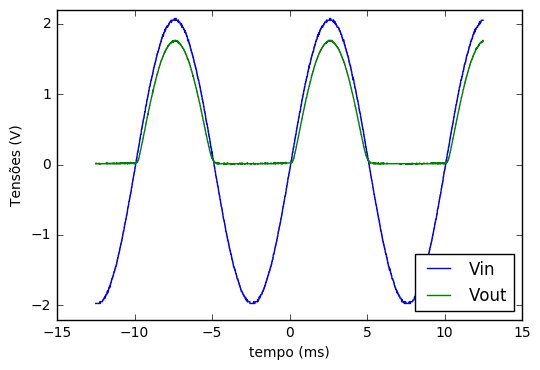

In [43]:
## aquisição de dados
t1, V1 = scope.ch1.read_channel()  # leitura do canal 1
t2, V2 = scope.ch2.read_channel()  # leitura do canal 2
## impressão das figuras
fig = plt.figure()  # definição da figura
ax = fig.add_subplot(111)  # definição do eixo
ax.plot(t1*1e3, V1, label = 'Vin')   # plota canal 1
ax.plot(t2*1e3, V2, label = 'Vout')   # plota canal 2
plt.axis([None, None, -1.1*Vpp/2, 1.1*Vpp/2])    # ajusta os máximos e mínimos dos gráficos
ax.set_ylabel('Tensões (V)')
ax.set_xlabel('tempo (ms)')
ax.legend(loc = 'lower right')
### salva em arquivo os dados da aquisição
file_name = 'diodo1'  # nome dos arquivos de sweep
scope.save_channels(file_name, PATH = PATH)    
fig.savefig(PATH + file_name + '.png', bbox_inches = 'tight')
plt.show()      # impressão na tela!

## Exemplo 2: Mantenha a mesma configuração e varie a tensão

... file => diodo_sweep_voltage1_17_51_13 saved!!


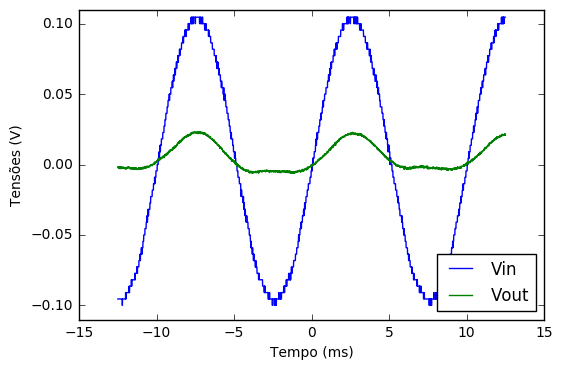

... file => diodo_sweep_voltage2_17_51_25 saved!!


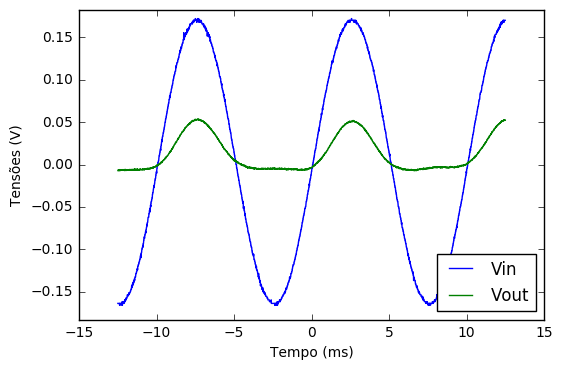

... file => diodo_sweep_voltage3_17_51_41 saved!!


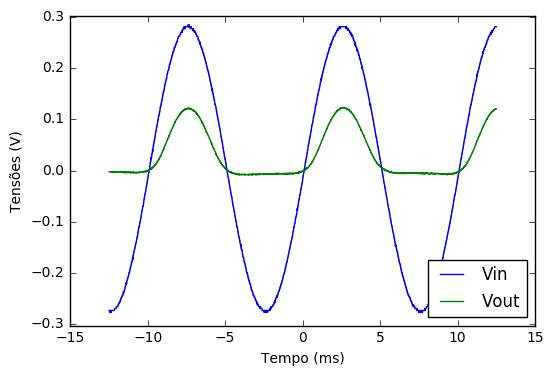

... file => diodo_sweep_voltage4_17_51_56 saved!!


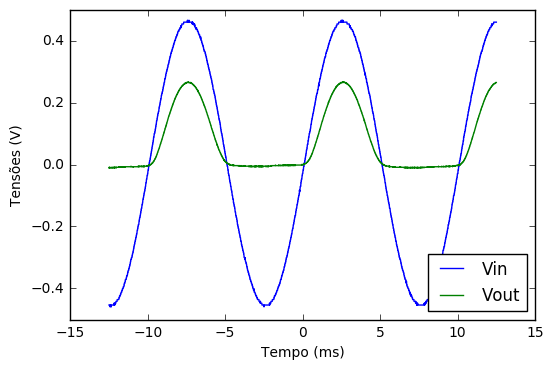

... file => diodo_sweep_voltage5_17_52_12 saved!!


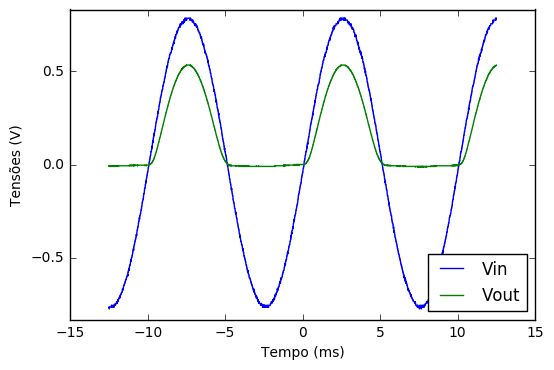

... file => diodo_sweep_voltage6_17_52_28 saved!!


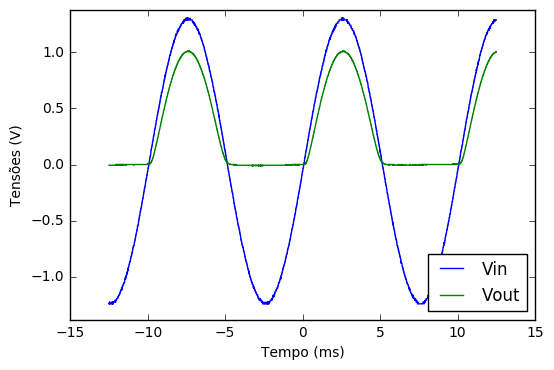

... file => diodo_sweep_voltage7_17_52_44 saved!!


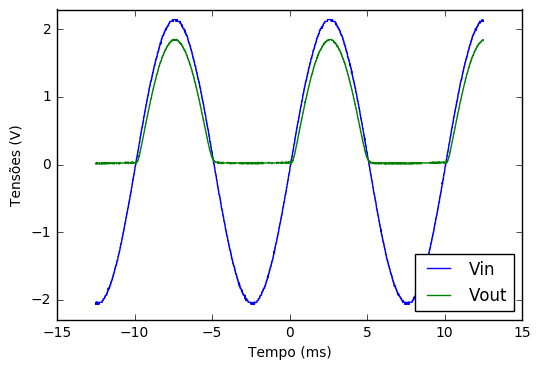

... file => diodo_sweep_voltage8_17_53_00 saved!!


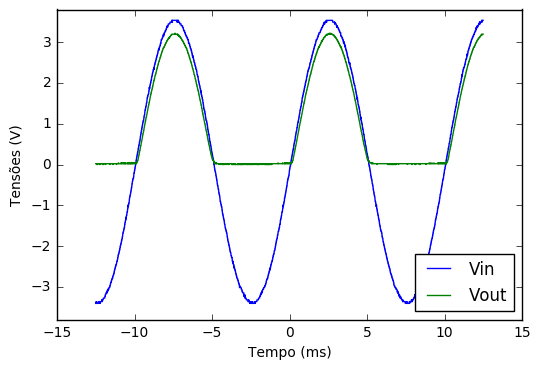

... file => diodo_sweep_voltage9_17_53_16 saved!!


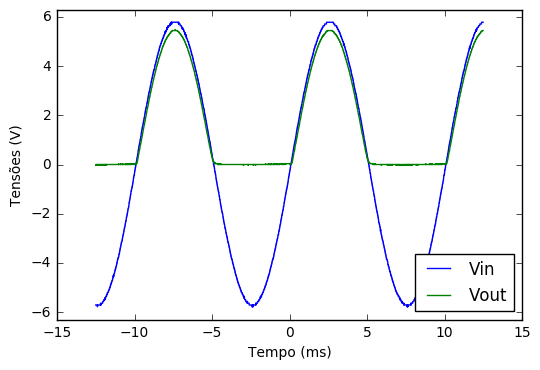

... file => diodo_sweep_voltage10_17_53_32 saved!!


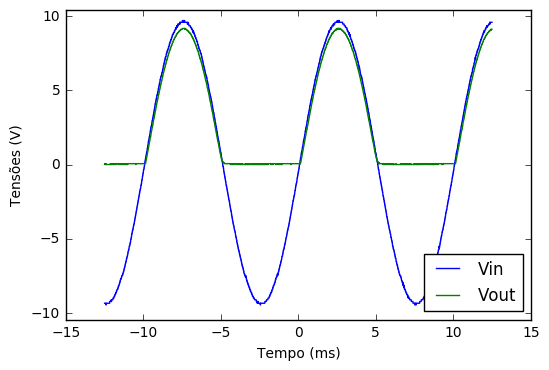

In [69]:
#### varredura de tensão
Va, Vb, Nv = 0.2, 19, 10  # frequências inicial, final e número de pontos
#### Aquisição de dados!! ####
V = np.logspace(np.log10(Va), np.log10(Vb), Nv, endpoint = True)  # varredura logaritmica
Vmax1, Vmax2 = [], []    # listas para guardar as variáveis
### aquisição de dados no gerador com varredura de tensão
for m, Vpp in enumerate(list(V)):  # loop de aquisição
    ### ajuste dos instrumentos
    func_gen.ch1.set_Vpp(Vpp)   # muda a frequência
    time.sleep(0.05)   # espere 50 microssegundos
    scope.ch1.set_smart_scale()    #  rescala o canal 1
    scope.ch2.set_smart_scale()    #  rescala o canal 2
    ### aquisição de dados
    Vmax1.append(scope.ch1.measure.maximum()) # acumula a medida do Vmax no canal 1
    time.sleep(0.05)  # wait between the data acquisition
    Vmax2.append(scope.ch2.measure.maximum()) # acumula a medida do Vmax no canal 2
    ### leitura dos traços temporais
    (t1, V1) = scope.ch1.read_channel()  # mede o canal 1
    (t2, V2) = scope.ch2.read_channel()  # mede o canal 2
    ### produção das figuras
    fig = plt.figure()  # definição da figura
    ax = fig.add_subplot(111)  # definição do eixo
    ax.plot(t1*1e3, V1, label = 'Vin')   # plota canal 1
    ax.plot(t2*1e3, V2, label = 'Vout')   # plota canal 2
    plt.axis([None, None, -1.1*Vpp/2, 1.1*Vpp/2])    # ajusta os máximos e mínimos dos gráficos
    ax.set_ylabel('Tensões (V)')
    ax.legend(loc = 'lower right')   # imprime as legendas no gráfico
    ax.set_xlabel('Tempo (ms)')
    ### salva em arquivo os dados da aquisição
    file_sweep_name = 'diodo_sweep_voltage' + str(m + 1)   # nome dos arquivos de sweep
    scope.save_channels(file_sweep_name, PATH = PATH)    
    fig.savefig(PATH + file_sweep_name + '.png', bbox_inches = 'tight')
    plt.show()      # impressão na tela!
Vmax1 = np.array(Vmax1)  # convete a lista em array
Vmax2 = np.array(Vmax2)  # convete a lista em array

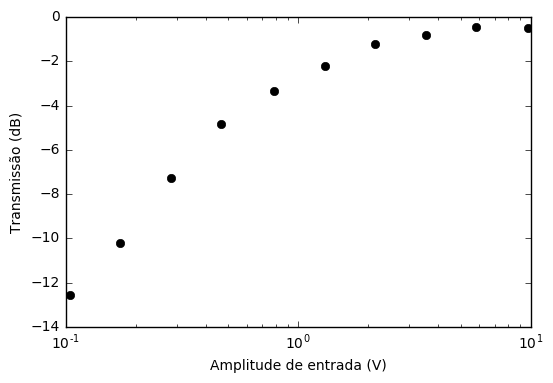

In [70]:
## Análise exemplo 1 (não mude a variável PATH)
T = Vmax2/Vmax1   # cálculo da transmissão 
T_dB = 20*np.log10(T)  # transmissão em dBdados = pd.DataFrame()
dados = pd.DataFrame()
dados['T'] , dados['T_dB'] = T, T_dB
dados['Vpp (V)'], dados['Vmax1 (V)'], dados['Vmax2 (V)'] = V, Vmax1, Vmax2 
# plota o diagrama de bode para a transmissão e exporta em png
fig = plt.figure()   # define uma figura
ax = fig.add_subplot(111)  # define um eixo
ax.plot(Vmax1, T_dB, 'ko')   # plota a transmissão 
ax.set_xscale('log')
# Por que não usamos escala log no eixo y também?
ax.set_xlabel('Amplitude de entrada (V)')   # seta escala do eixo x
ax.set_ylabel('Transmissão (dB)')   # seta escala do eixo y
fig.savefig(PATH + 'trans_diodo.png', bbox_inches = 'tight')  # salva figura na pasta de trabalho
dados.to_csv(PATH + 'dados_diodo2.csv')
plt.show()

## Exemplo 3: conecte um capacitor de 22 nC entre o diodo e o terra e meça a tensão entre o diodo e o capacitor

In [85]:
Va, Vb, Nv = 10., 3., 4  # frequências inicial, final e número de pontos
#### Aquisição de dados!! ####
V = np.linspace(Va, Vb, Nv, endpoint = True)  # varredura logaritmica
func_gen.ch1.set_Vpp(Va)
scope.ch1.set_smart_scale()  # rescala o canal 1
scope.ch2.set_scale(scope.ch1.scale())
scope.ch2.set_position(scope.ch1.position())
for m, Vpp in enumerate(list(V)):
    func_gen.ch1.set_Vpp(Vpp)
    time.sleep(5.0)   # oberve o osciloscópio e veja o atraso entre a mudança das duas curvas

## Exemplo 4: troque o capacitor de 22 nC por um de 2.2 uC

In [88]:
Va, Vb, Nv = 10., 3., 4  # frequências inicial, final e número de pontos
#### Aquisição de dados!! ####
V = np.linspace(Va, Vb, Nv, endpoint = True)  # varredura logaritmica
func_gen.ch1.set_Vpp(Va)
scope.ch1.set_smart_scale()  # rescala o canal 1
scope.ch2.set_scale(scope.ch1.scale())
scope.ch2.set_position(scope.ch1.position())
for m, Vpp in enumerate(list(V)):
    func_gen.ch1.set_Vpp(Vpp)
    time.sleep(2.0)   # oberve o osciloscópio e veja o atraso entre a mudança das duas curvas
# Viu alguma diferença? O tempo de reação mudou?

## Exemplo 5: Retire o capacitor de retificação e varie a frequência

In [89]:
#### Não mude a variável PATH  ####
Vpp = 4.0    # tensão pico-a-pico
func_gen.ch1.turn_on()   # liga o canal 1
freq0 = 100. # ajusta a frequência para 100 Hz
# parâmetros iniciis do gerador
func_gen.ch1.set_frequency(freq0) 
func_gen.ch1.set_Vpp(Vpp)
func_gen.ch1.set_offset(0.0)
func_gen.ch1.set_phase(0.0)
scope.ch1.set_smart_scale()  # rescala o canal 1
scope.ch2.set_smart_scale()  # rescala o canal 2

... file => diode_freq_sweep1_18_26_02 saved!!


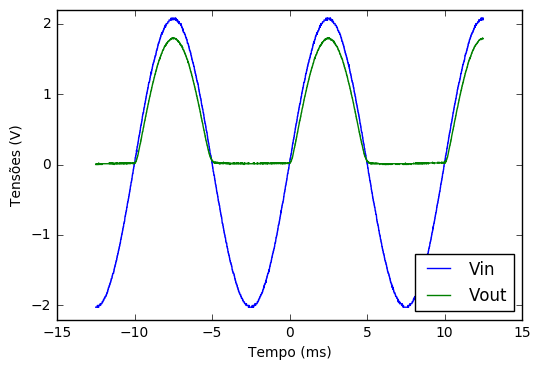

... file => diode_freq_sweep2_18_26_12 saved!!


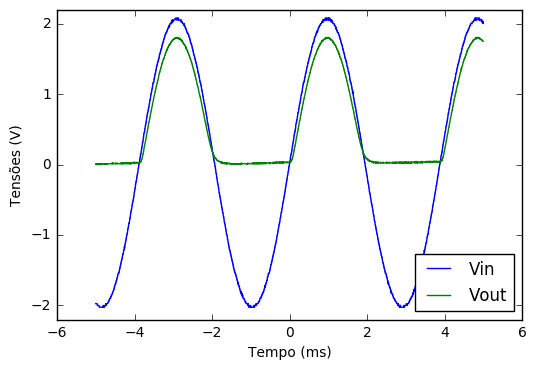

... file => diode_freq_sweep3_18_26_21 saved!!


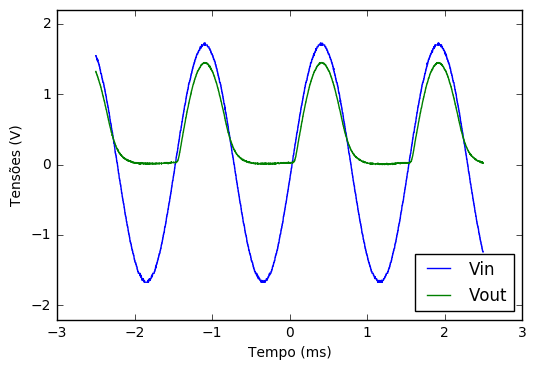

... file => diode_freq_sweep4_18_26_30 saved!!


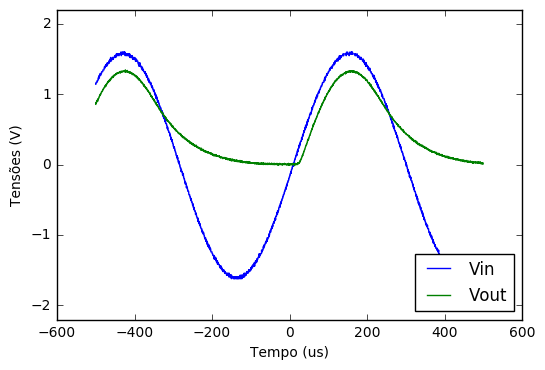

... file => diode_freq_sweep5_18_26_40 saved!!


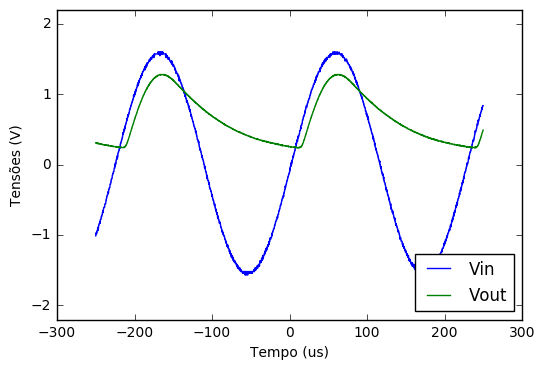

... file => diode_freq_sweep6_18_26_49 saved!!


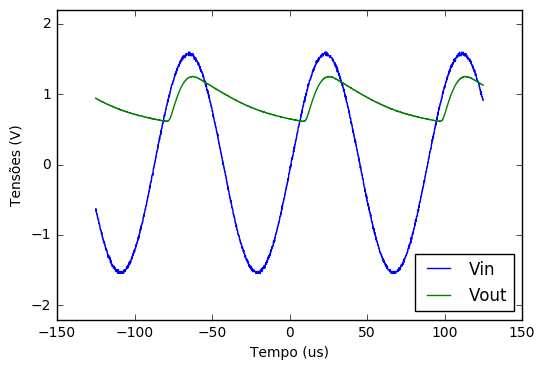

... file => diode_freq_sweep7_18_26_58 saved!!


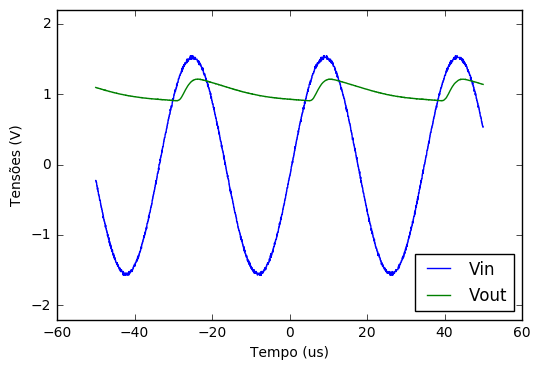

... file => diode_freq_sweep8_18_27_08 saved!!


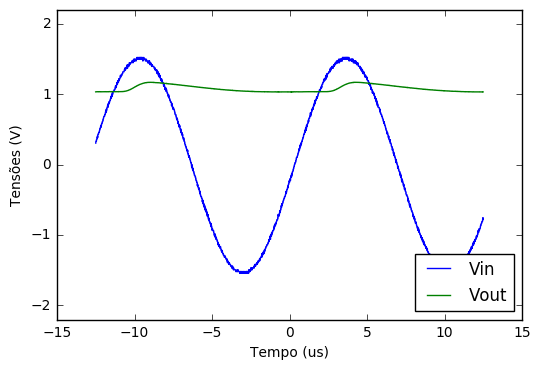

... file => diode_freq_sweep9_18_27_17 saved!!


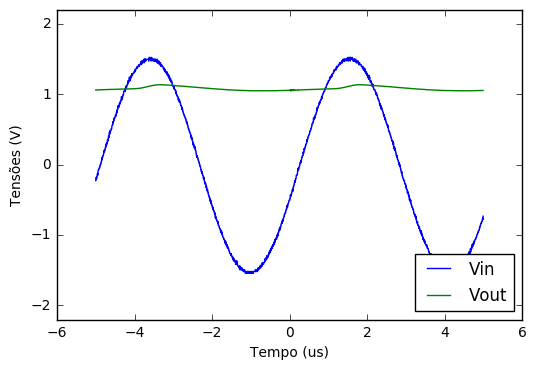

... file => diode_freq_sweep10_18_27_27 saved!!


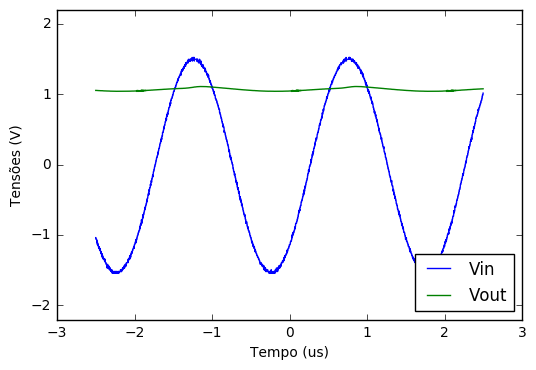

In [90]:
freq0, freq1, Nfreq = 100, 500e3, 10  # frequências inicial, final e número de pontos
#### Aquisição de dados!! ####
freq = np.logspace(np.log10(freq0), np.log10(freq1), Nfreq, endpoint = True)  # varredura logaritmica
Vmax1, Vmax2 = [], []    # listas para guardar as variáveis
### aquisição de dados no gerador com varredura de frequência
for m, freqP in enumerate(list(freq)):  # loop de aquisição
    ### ajuste dos instrumentos
    func_gen.ch1.set_frequency(freqP)   # muda a frequência
    periodP = 1./freqP   # período da onda
    num = np.floor(-np.log10(periodP)/3.) + 1 # referência para a escala do gráfico
    scope.set_horizontal_scale(periodP/4.)  # escala horizontal = 1/4 período (2.5 oscilações em tela)
    time.sleep(0.05)   # espere 50 microssegundos
    scope.ch2.set_smart_scale()    #  rescala o canal 2
    ### aquisição de dados
    Vmax1.append(scope.ch1.measure.maximum()) # acumula a medida do Vmax no canal 1
    time.sleep(0.05)  # wait between the data acquisition
    Vmax2.append(scope.ch2.measure.maximum()) # acumula a medida do Vmax no canal 2
    ### leitura dos traços temporais
    (t1, V1) = scope.ch1.read_channel()  # mede o canal 1
    (t2, V2) = scope.ch2.read_channel()  # mede o canal 2
    ### produção das figuras
    fig = plt.figure()  # definição da figura
    ax = fig.add_subplot(111)  # definição do eixo
    ax.plot(t1*10**(3*num), V1, label = 'Vin')   # plota canal 1
    ax.plot(t2*10**(3*num), V2, label = 'Vout')   # plota canal 2
    plt.axis([None, None, -1.1*Vpp/2, 1.1*Vpp/2])    # ajusta os máximos e mínimos dos gráficos
    ax.set_ylabel('Tensões (V)')
    ax.legend(loc = 'lower right')   # imprime as legendas no gráfico
    if num == 0.0: ax.set_xlabel('Tempo (s)')    
    if num == 1.0: ax.set_xlabel('Tempo (ms)')
    if num == 2.0: ax.set_xlabel('Tempo (us)')
    ### salva em arquivo os dados da aquisição
    file_sweep_name = 'diode_freq_sweep' + str(m + 1)   # nome dos arquivos de sweep
    scope.save_channels(file_sweep_name, PATH = PATH)    
    fig.savefig(PATH + file_sweep_name + '.png', bbox_inches = 'tight')
    plt.show()      # impressão na tela!
Vmax1 = np.array(Vmax1)  # convete a lista em array
Vmax2 = np.array(Vmax2)  # convete a lista em array